# Maximum Margin Classification with SVM

In [1]:
import sys
import os

current_dir = os.path.abspath('')

src_dir = os.path.join(current_dir, '..', '..', 'src')

sys.path.append(src_dir)

import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from utils.plotDecisionRegions import plot_decision_regions

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # Grab second and third features (petal length and petal width)
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # 30% test data & 70% training data
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/classification/../../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Text(0, 0.5, 'petal width [standardized]')

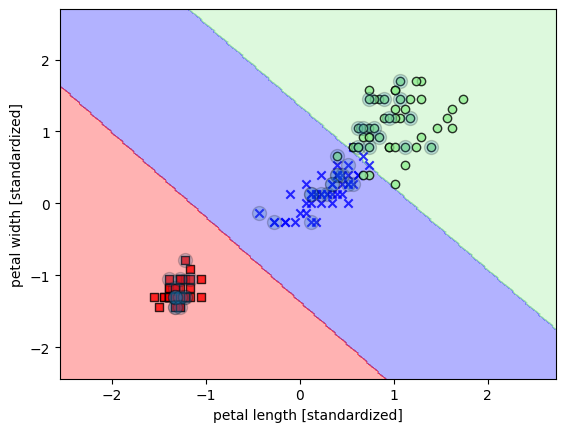

In [4]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# Learnings
For the most part, I understand that $\frac{2}{\|w\|}$ represents the distance between the hyperplane and the closest point from the training data to the negative and positive hyperplanes. By minimizing $\|w\|$ (AKA L2 norm) as much as we can while still having accurate classifications, we are able to widen the margin and reduce variance.

It seems that logsitic regression and SVM achieve similar results, but SVM is a bit of a more complicated model. I feel like I have not fully conceptulized the math behind SVM along with the usage of a slack variable, but I understand the general concept. TODO: I will probably need to come back to this later and spend more time on the math.